## Upload dataset

In [1]:
from google.colab import files
upload = files.upload()

Saving dataset (2).zip to dataset (2).zip


In [ ]:
!unzip dataset.zip

## Prepare the data

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height = img_width = 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
  
test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 136 files belonging to 4 classes.
Found 56 files belonging to 4 classes.


## Create the neural network

In [5]:
num_classes = 4

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

## Train and test the model

In [ ]:
model.fit(
    train_ds,
    epochs=1000
)

In [8]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 5ms/step - loss: 1.1553 - accuracy: 0.8571


[1.1552765369415283, 0.8571428656578064]

## Show the predicted and real wound type for a subset of images

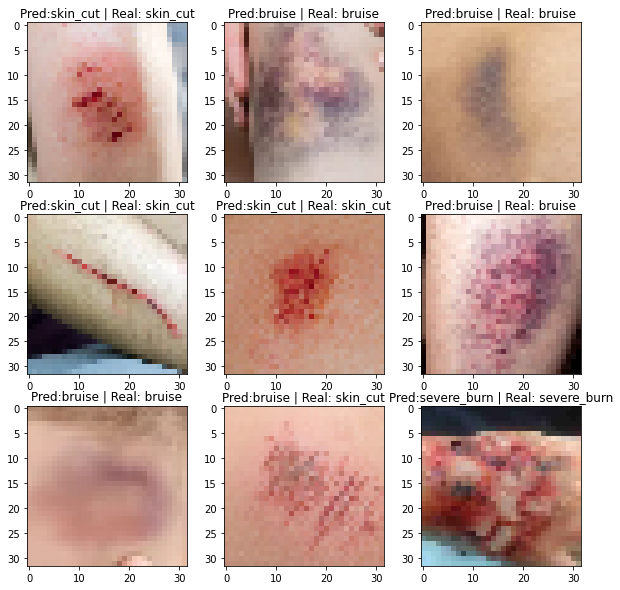

In [9]:
import numpy

plt.figure(figsize=(10, 10))
class_names = ["bruise", "light_burn", "severe_burn", "skin_cut"]

for images, labels in test_ds.take(1):
  classifications = model(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred:" + class_names[index] + " | Real: " + class_names[labels[i]])